In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split # Creating training and testing set 
from sklearn.linear_model import LinearRegression # Model 
import plotly.express as px

In [5]:
df = pd.read_csv("/content/CardioGoodFitness.csv", index_col=False)

### Exploring the dataset to find out what it contains.

This dataset contains customer treadmill purchase information



In [6]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
# Converting 'object' data types to 'category' saves memory
df.Product = df.Product.astype('category')
df.Gender = df.Gender.astype('category')
df.MaritalStatus = df.MaritalStatus.astype('category')

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


## Summary stats
* The minimum age of a customer is 18 years. 
* The oldest is 50 years. 
* In terms of education, their average years is 15.6 years. 
* The income reported range from 29,562 to 104,581.





In [12]:
# Using the describe function as passing a parameter to exclude non-numerical data.

df.describe(exclude = 'number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [13]:
df.Product.value_counts(normalize=True) * 100


TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: Product, dtype: float64

## What do we know about the customers and products on sale?

* There are three unique products. 

* The most popular is the TM195 which appeared 80 times.

* The data showed that most customers were males.

* The most common marital status of customers was Partnered.

In [14]:
model_group = df.groupby([df.Product])


In [15]:
# Looking out for the minimum values across all products

model_group[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].min()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,18,12,2,1,29562,38
TM498,19,12,2,1,31836,21
TM798,22,14,3,3,48556,80


It appears model 'TM798' is popular among among older customers as the minimum age starts from 22 with the customers also having the highest minimum education. The users of 'TM798' also have high usage and have more milage.

In [16]:
# Looking out for the minimum values across all products
model_group[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].max()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,50,18,5,5,68220,188
TM498,48,18,5,4,67083,212
TM798,48,21,7,5,104581,360


Looking at the correlation or relationship between the numeric values. This is to understand how they are related to each other.

In [17]:
#Using the pandas corr() functiion

dataCorrelation = round(df.corr(), 3)

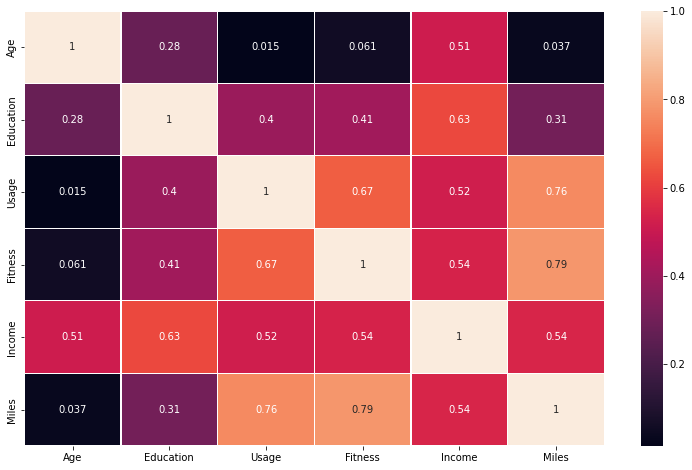

In [18]:
plt.figure(figsize=(13,8))
sns.heatmap(dataCorrelation, annot=True, linewidths = 0.2, linecolor = 'white')




* There's a very strong positive correlation between Miles and Fitness. This means that higher the miles go, the better fit the person is. Another very strong correlation can be observed between Miles and Usage, the higher the usage, the more miles. 

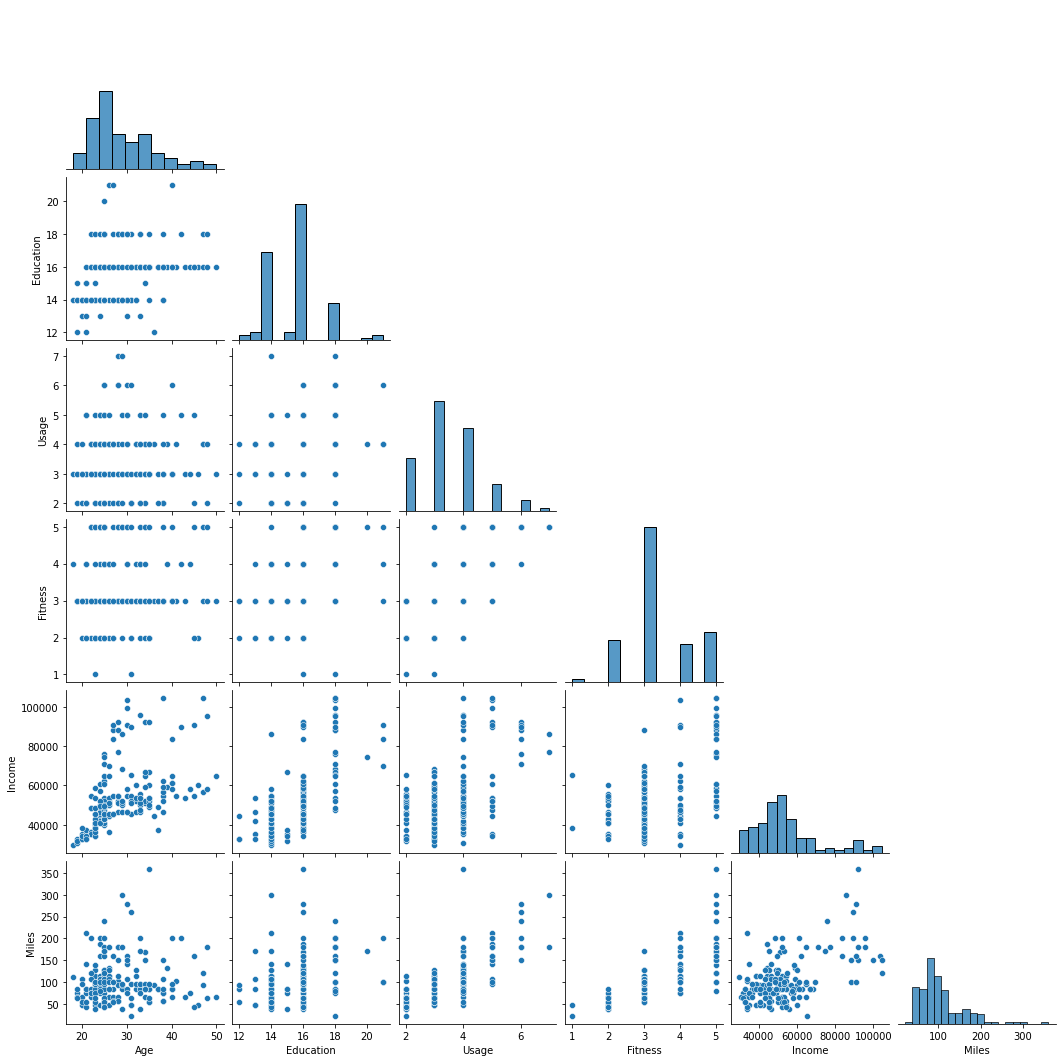

In [19]:
sns.pairplot(df, corner = True, kind = 'scatter')


In [20]:
def bar_perc(plot, feature):
  total = len(feature)
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total )
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()                  # height of the plot
    ax.annotate(percentage, (x, y), size = 12) 


Defining a function that prints bar charts of the categorical data. 

1. bar_perc is the name of the function
2. plot, features are the parameters
3. total = the length of the observed value in a given column.
4. percentage is being set to one decimal {:.1f}. The obeserved height of say Product A is divided by the total of all Products, multiplied by 100 and set to 1 decimal place and the % added.
5. The subsequent lines are used to set the height of the plots and annotate them as well.

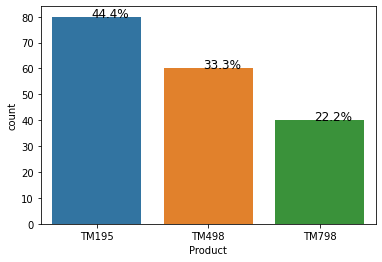

In [21]:
ax = sns.countplot(x ='Product', data = df)     # creating a countplot and assigning that to a variable ax
bar_perc(ax, df['Product'])           # calling the  bar and passing the argument
          

The TM195, 44.4% was the most popular of the products observed. Followedd by the TM498, 33.3%, and TM798, 22.2%.

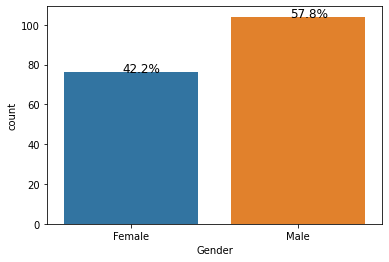

In [22]:
ax = sns.countplot(x = 'Gender', data = df)
bar_perc(ax, df['Gender'])

57.8% of the observed gender Male and 42.2% was female.

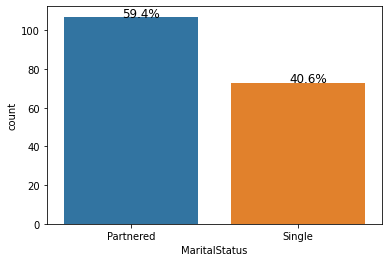

In [23]:
ax = sns.countplot(x = 'MaritalStatus', data = df)
bar_perc(ax, df['MaritalStatus'])

Married customers make up 59.4% with 40.6% of customers are unmarried.


# Analysing columns with numerical data

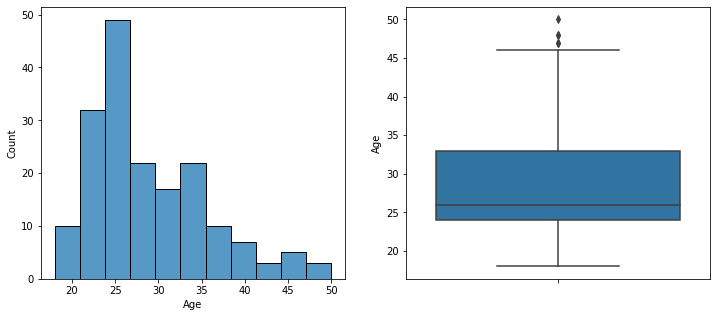

In [24]:
plt.figure(figsize = (12,5))   #Image dimensions
plt.subplot(1,2,1)              # specifying the placement of the 1st subplot
sns.histplot(df.Age)          # creating a histplot as the 1st subplot
plt.subplot(1,2,2)              # specifying the placement of the 2nd subplot
sns.boxplot(y = df.Age)       # creating a boxplot as the 2nd subplot
plt.show()           

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


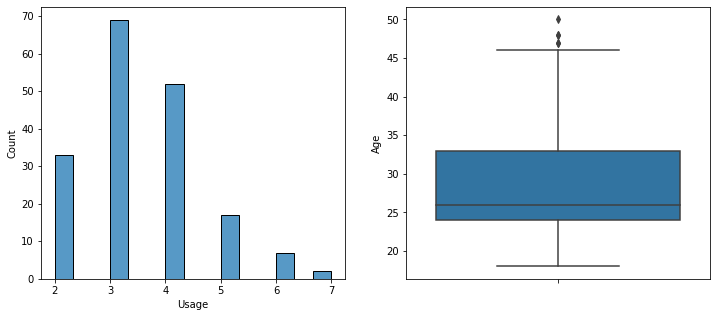

In [26]:
plt.figure(figsize = (12,5))   #Image dimensions
plt.subplot(1,2,1)              # specifying the placement of the 1st subplot
sns.histplot(df.Usage)          # creating a histplot as the 1st subplot
plt.subplot(1,2,2)              # specifying the placement of the 2nd subplot
sns.boxplot(y = df.Age)       # creating a boxplot as the 2nd subplot
plt.show() 

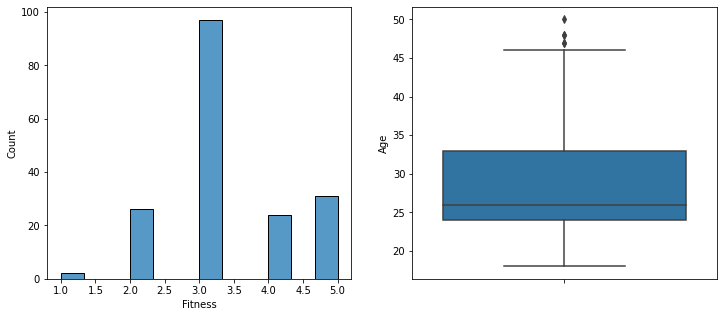

In [27]:
plt.figure(figsize = (12,5))   #Image dimensions
plt.subplot(1,2,1)              # specifying the placement of the 1st subplot
sns.histplot(df.Fitness)          # creating a histplot as the 1st subplot
plt.subplot(1,2,2)              # specifying the placement of the 2nd subplot
sns.boxplot(y = df.Age)       # creating a boxplot as the 2nd subplot
plt.show() 

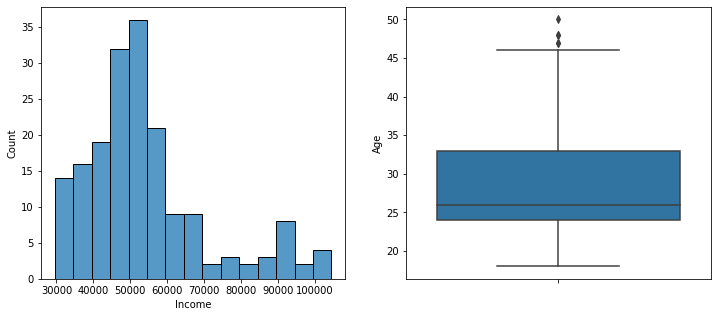

In [28]:
plt.figure(figsize = (12,5))   #Image dimensions
plt.subplot(1,2,1)              # specifying the placement of the 1st subplot
sns.histplot(df.Income)          # creating a histplot as the 1st subplot
plt.subplot(1,2,2)              # specifying the placement of the 2nd subplot
sns.boxplot(y = df.Age)       # creating a boxplot as the 2nd subplot
plt.show()                                                                                                                             

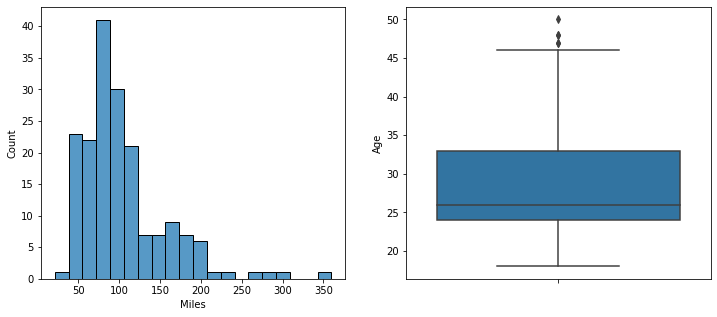

In [29]:
plt.figure(figsize = (12,5))   #Image dimensions
plt.subplot(1,2,1)              # specifying the placement of the 1st subplot
sns.histplot(df.Miles)          # creating a histplot as the 1st subplot
plt.subplot(1,2,2)              # specifying the placement of the 2nd subplot
sns.boxplot(y = df.Age)       # creating a boxplot as the 2nd subplot
plt.show()       

### Explore relationship between numerical data. This is similar to the correlation analysis that we did earlier.

[Text(0.5, 1.0, 'Miles peaked among runners aged 42')]

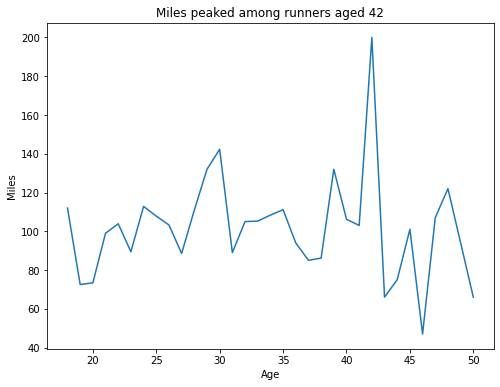

In [34]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Age', y = 'Miles', data = df, ci = None).set(title="Miles peaked among runners aged 42")


[Text(0.5, 1.0, 'Miles peaked among runners aged 42')]

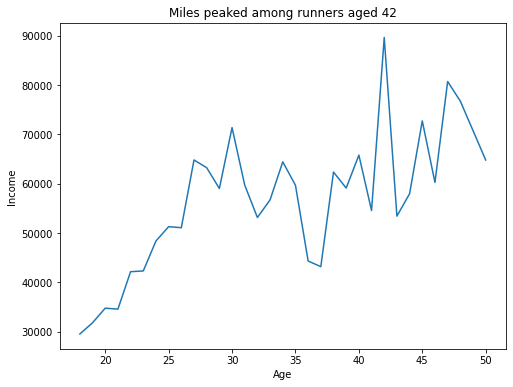

In [35]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Age', y = 'Income', data = df, ci = None).set(title="Miles peaked among runners aged 42")


[Text(0.5, 1.0, 'Miles peaked among runners aged 42')]

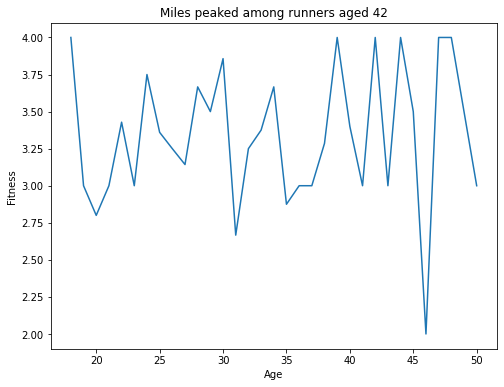

In [36]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Age', y = 'Fitness', data = df, ci = None).set(title="Miles peaked among runners aged 42")


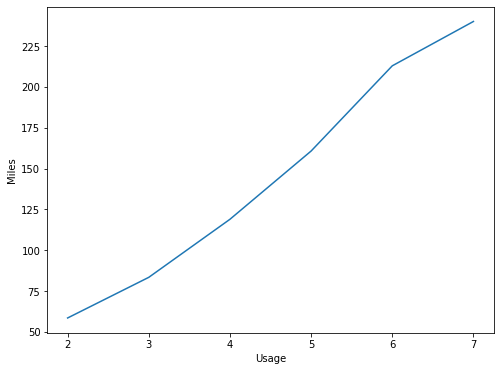

In [37]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Usage', y = 'Miles', data = df, ci = None)


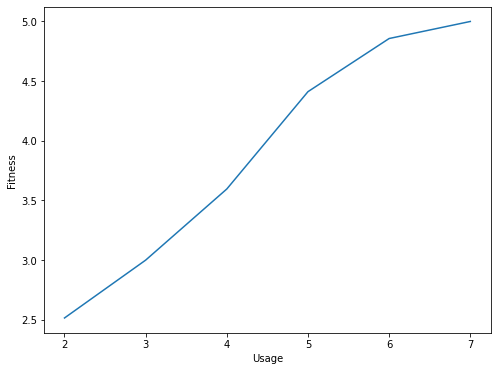

In [38]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Usage', y = 'Fitness', data = df, ci = None)

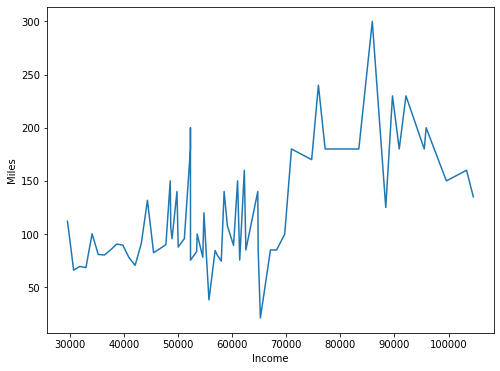

In [39]:
plt.figure(figsize=(8,6))
sns.lineplot(x = 'Income', y = 'Miles', data = df, ci = None)


* Product vs Gender

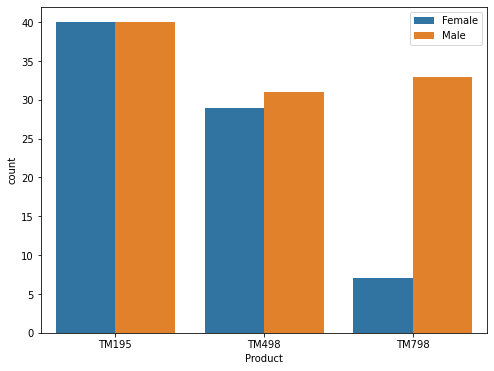

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Product', data = df, hue = 'Gender')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.5, 1)) #Setting the position of the legend


* Marital Status vs Gender

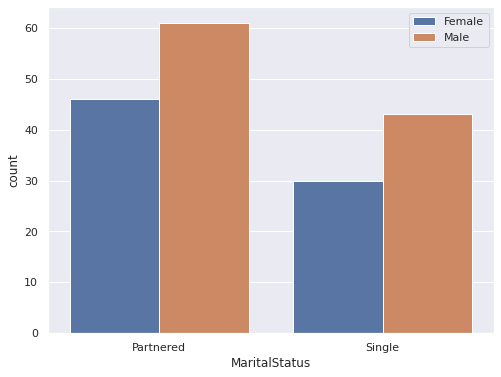

In [94]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'MaritalStatus', data = df, hue = 'Gender')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.5, 1)) #Setting the position of the legend

* Product vs Marital Status

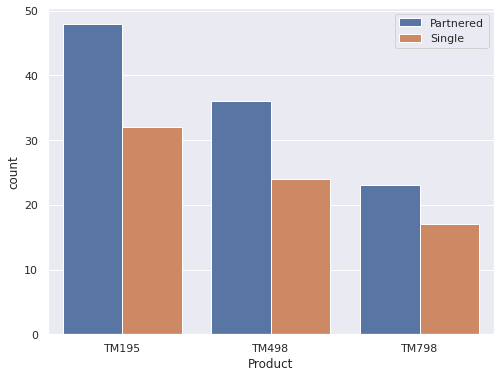

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Product', data = df, hue = 'MaritalStatus')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.5, 1)) #Setting the position of the legend

* Product vs Age





In [118]:
fig = px.box(df, x="Product", y="Age", width=800, height=400)
fig.show()

In [120]:

fig = px.box(df, x="Product", y="Fitness", width=800, height=400)
fig.show()



In [121]:

fig = px.box(df, x="Product", y="Income", width=800, height=400)
fig.show()


* Marital Status and Usage

In [122]:

plt.figure(figsize=(8,6))
fig = px.box(df, x="MaritalStatus", y="Usage", width=800, height=400)
fig.show()

<Figure size 576x432 with 0 Axes>

## Multivariate Analysis

* Product vs Education vs Usage vs Gender



In [129]:
fig = px.bar(df.sort_values(by='Usage'), x="Product", y="Education", color="Usage", barmode="group", facet_col="Gender", width=800, height=400)
fig.show()

* Product vs Income vs Usage vs Gender



In [132]:
fig = px.bar(df.sort_values(by='Usage'), x="Usage", y="Income", color="Product", barmode="stack", facet_col="Gender", width=800, height=400)
fig.show()

* Product vs Age vs Usage vs Gender

In [138]:
fig = px.bar(df.sort_values(by='Usage'), x="Usage", y="Age", barmode="stack", facet_col="Gender", width=800, height=400)
fig.show()

* Fitness vs Usage vs Product



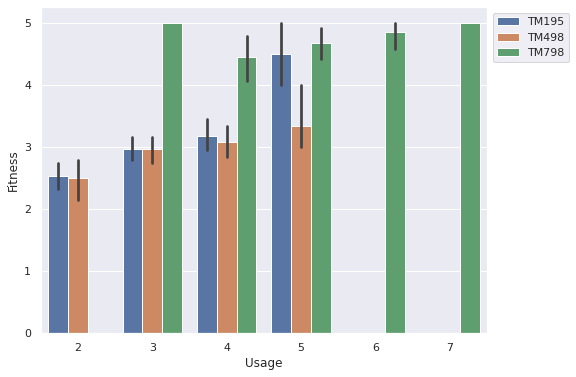

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'Usage', y = 'Fitness', data = df, hue = 'Product')
plt.legend(bbox_to_anchor=(1, 1))

* Miles vs Income vs Usage


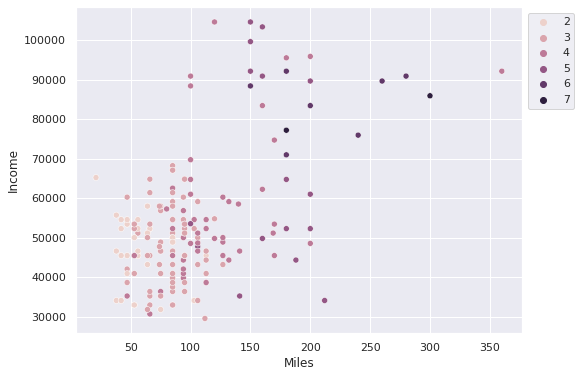

In [114]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Miles', y = 'Income', hue = 'Usage', data = df)
plt.legend(bbox_to_anchor=(1,1))

* Usage vs Miles vs Fitness vs Product

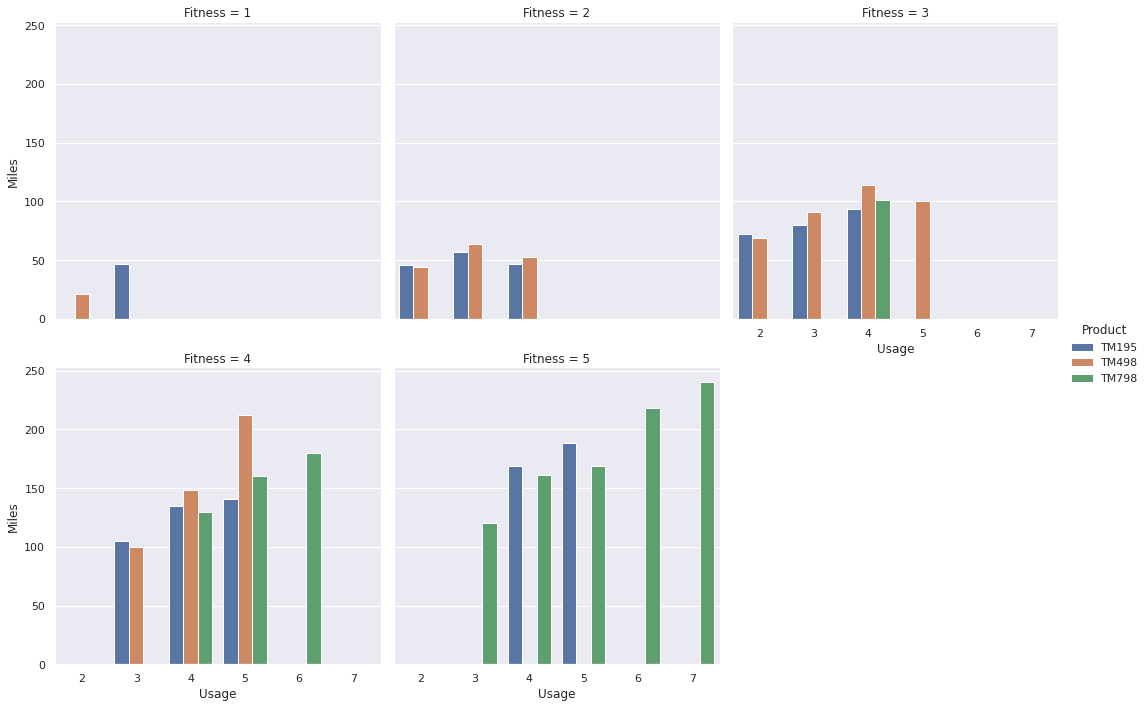

In [115]:
# col_wrap refers where to break the column and move to the next row
sns.catplot(x = 'Usage',  y = 'Miles', col = 'Fitness', data = df, hue = 'Product', kind = 'bar', ci = None, col_wrap = 3)